# Introdução ao Modelo ARIMA (Autoregressive Integrated Moving Average Model)

## Sobre o ARIMA
ARIMA é a acrônimo que significa "Autoregressive Integrated Moving Average Model" (Modelo de médias móveis integrado de auto regressivo).

Esse acrônimo é descritivo, capturando os aspectos chave do próprio modelo. Resumidamente, estes são:

* AR: Auto regressão. Um modelo que utiliza a relação de dependência entre uma observação e um conjunto de observações passadas.
* I: Integrated. O uso de diferenças das obervações para tornar uma série estacionária.
* MA: Média móvel. Um modelo que usa a dependência entre uma observação e o erro residual das média móveis aplicadas em observações anteriores. 

Cada um desses componentes são explicitamente especificados no modelo através de parâmetros. Uma notação padrão é utilizada como ARIMA(p, d, q), onde os parâmetros são substituidos por valores inteiros para indicar o modelo ARIMA específico que está sendo utilizado. 

Os parâmetros do modelo ARIMA são definidos como:

* p: o número de observações passadas inclusas no modelo, também chamado de "ordem do lag".
* d: o número de diferenças tomadas, também chamado de "grau de diferenciação"
* q: o tamanho da janela da média móvel, também chamado de "ordem da média móvel"

O valor 0 pode ser utilizado como parâmetro, indicando que o elemento não será utilizado. Dessa forma, o modelo ARIMA pode ser configurado como um modelo ARMA, ou até mesmo um simples modelo AR, I, ou MA.

## ARIMA com python/pandas
Para trabalharmos com o modelo ARIMA utilizaremos a base de dados ```shampoo.csv```, contendo o histório de vendas de shampoo de uma empresa qualquer.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

shampoo = pd.read_csv('shampoo.csv')
shampoo.head()

,Month,Sales
0,2000-01,266.0
1,2000-02,145.9
2,2000-03,183.1
3,2000-04,119.3
4,2000-05,180.3


Converteremos a coluna ```Month``` para o formato ```datetime``` e faremos dela o indice do ```DataFrame```. 

In [24]:
shampoo.Month = pd.to_datetime(shampoo.Month)
shampoo.set_index('Month', inplace=True)

Para facilitar o trabalho, faremos uma copia do ```DataFrame``` ```shampoo``` passando somente a coluna ```Sales```. Esse operação criará um objeto do tipo ```Series```. Chamaremos a ```Series``` criada de ```vendas```. 

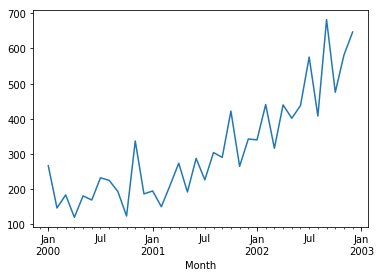

In [25]:
vendas = shampoo.Sales
vendas.plot()

Percebemos que as vendas de shampoo possuem uma tendência clara. Isso sugere que a série temporal não é estacionária e necessita de diferenças sucessivas para torná-la estacionária. 

Para analisar a autocorrelação da série, utilizaremos o gráfico de autocorrelação. Para tanto, utilizaremos o comando ```pd.plotting.autocorrelation_plot(Series)```.

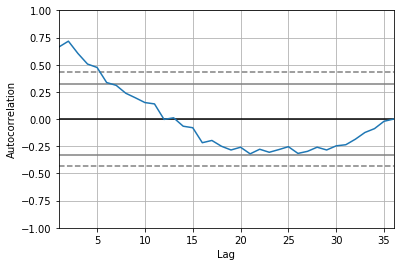

In [26]:
pd.plotting.autocorrelation_plot(vendas)

Rodando o exemplo, podemos observar a existência de autocorrelação positiva com os 12 primeiros lags, sendo bastante significativa para os 5 primeiros. Estamos interessados em utilizar o número de lags associado ao máximo valor de autocorrelação. Para verificar o valor de autocorrelação para um lag específico utilizamos o comando ```Series.autocorr(lag=numero_de_lags)```.

In [27]:
print(vendas.autocorr(lag=1))
print(vendas.autocorr(lag=2))
print(vendas.autocorr(lag=3))

0.7194822398024306
0.8507433352850972
0.7549486594101285


Faremos agora a importação do modelo ARIMA contido em ```statsmodels.tsa.arima_model```.

In [28]:
from statsmodels.tsa.arima_model import ARIMA

Para criar o modelo, utilizaremos o comando ```ARIMA(Series, freq='frequencia_da_serie', order=(p, d, q)).fit()```. 

O parâmetro ```freq``` recebe a frequência da série. Para configurar este parâmetro, utilizaremos o comando ```Series.index.inferred_freq```. Para o parâmetro ```order```, faremos a configuração ```(3, 1, 0)```, representando um modelo autoregressivo com lag igual a três e uma diferença sucessiva para garantir a estacionaridade da série.

In [94]:
model = ARIMA(shampoo, freq=shampoo.index.inferred_freq, order=(3,1,0)).fit()
model.resid.describe()

count     35.000000
mean      -4.793180
std       70.239318
min     -132.092007
25%      -42.505979
50%      -10.017635
75%       26.455825
max      145.271199
dtype: float64

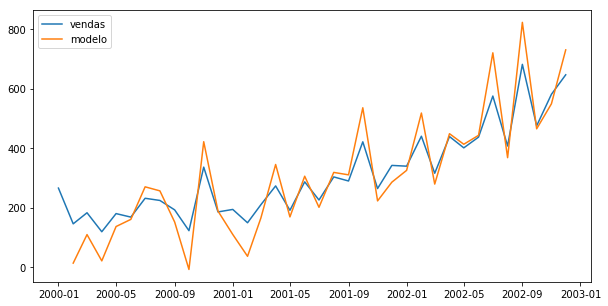

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(vendas)
plt.plot(vendas + model.resid)
plt.legend(['vendas', 'modelo'])

## Previsão móvel com modelo ARIMA


O modelo ARIMA pode ser utilizado para fazer previsões futuras.

Podemos utilizar o comando ```forecast()``` para fazer previsões. O resultado da função é a previsão do próximo período com seu valor esperado, desvio padrão e intervalo de confiança.

In [100]:
model.forecast()[0]

589.4910048246796

Nesse caso, a previsão para o peíodo de 2003-01 é de aproximadamente 589 unidades.

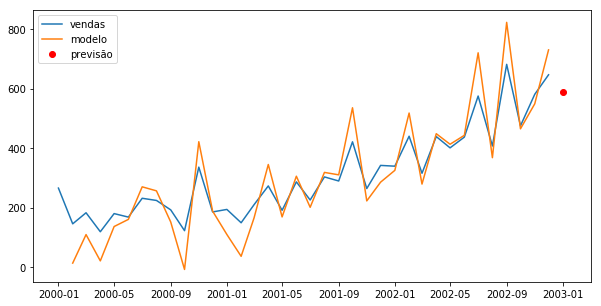

In [106]:
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(vendas)
plt.plot(vendas + model.resid)
plt.scatter([np.datetime64('2003-01')], model.forecast()[0], color='red')
plt.legend(['vendas', 'modelo', 'previsão'])